## Importing Libraries and Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\bank-marketing-campaign-analysis\Dataset\bank.csv")

# Dataset Overview

In [3]:
# Basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nColumn Names:")
print(df.columns.tolist())

Dataset Shape: (11162, 17)

First 5 rows:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes



Column Names:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


## Column Understanding

### One-line description for every column

* **age** Client's age
* **job** Type of job (admin, management, technician, etc.)
* **marital** Marital status
* **education** Level of education
* **default** Has credit in default?
* **balance** Average yearly balance
* **housing** Has housing loan?
* **loan** Has personal loan?
* **contact** Contact communicati type
* **day** Last contact day of the month
* **month** Last contact month
* **duration** Last contact duration (seconds)
* **campaign** Number of contacts during this campaign
* **pdays** Days since last contact (-1 = never)
* **previous** Number of contacts before this campaign
* **poutcome** Outcome of previous campaign
* **deposit** Target - Did the client subscribe? (yes/no)

In [4]:
print("\nData Types:")
print(df.dtypes)

print("\nAll numeric columns are correctly typed. Categorical columns have been converted to 'category' dtype for efficiency.")


Data Types:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

All numeric columns are correctly typed. Categorical columns have been converted to 'category' dtype for efficiency.


# Cleaning & Preprocessing

In [5]:
# Duplicates
print("Duplicate rows:", df.duplicated().sum())

# Missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
print("\nMissing Values Report:")
print(pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct.round(2)}))

Duplicate rows: 0

Missing Values Report:
           Missing Count  Percentage
age                    0         0.0
job                    0         0.0
marital                0         0.0
education              0         0.0
default                0         0.0
balance                0         0.0
housing                0         0.0
loan                   0         0.0
contact                0         0.0
day                    0         0.0
month                  0         0.0
duration               0         0.0
campaign               0         0.0
pdays                  0         0.0
previous               0         0.0
poutcome               0         0.0
deposit                0         0.0


## Missing Values Handling Plan
- job & education → Replaced 'unknown' with mode (very low missing %)
- contact & poutcome → Kept 'unknown' as a meaningful category (high percentage is normal in marketing data)
- No columns were dropped

In [6]:
# Duplicates & Validity
print("Exact duplicate rows:", df.duplicated().sum())

# Validity checks
print("\nValidity Checks:")
print("Age outside 18-100 :", ((df['age']<18) | (df['age']>100)).sum())
print("Duration <= 0       :", (df['duration'] <= 0).sum())
print("Campaign == 0       :", (df['campaign'] == 0).sum())

Exact duplicate rows: 0

Validity Checks:
Age outside 18-100 : 0
Duration <= 0       : 0
Campaign == 0       : 0


## Category Cleanliness
All labels are consistent (lowercase, no extra spaces or typos). Converted object columns to category dtype.

In [7]:
# Convert to category
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
            'contact', 'month', 'poutcome', 'deposit']
for col in cat_cols:
    df[col] = df[col].astype('category')

# Handle 'unknown'
for col in ['job', 'education']:
    df[col] = df[col].replace('unknown', np.nan)
    df[col] = df[col].fillna(df[col].mode()[0])

C:\Users\Admin\AppData\Local\Temp\ipykernel_29532\1078310167.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[col] = df[col].replace('unknown', np.nan)


In [8]:
# Outlier treatment (Winsorizing)
num_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
for col in num_cols:
    lower = np.percentile(df[col], 1)
    upper = np.percentile(df[col], 99)
    df[col] = np.clip(df[col], lower, upper)

# New features
df['previously_contacted'] = (df['pdays'] > -1).astype(int)
df['any_loan'] = ((df['housing'] == 'yes') | (df['loan'] == 'yes')).astype(int)
df['deposit_num'] = df['deposit'].map({'yes': 1, 'no': 0})

# Statistics and EDA

In [9]:
# Numeric summary
print("Numeric Summary:")
display(df.describe().round(2))

Numeric Summary:


,age,balance,day,duration,campaign,pdays,previous,previously_contacted,any_loan
count,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00,11162.00
mean,41.20,1430.77,15.66,368.06,2.43,50.11,0.78,0.25,0.53
std,11.73,2324.02,8.42,327.56,2.18,103.02,1.80,0.44,0.50
min,22.00,-522.00,1.00,14.00,1.00,-1.00,0.00,0.00,0.00
25%,32.00,122.00,8.00,138.00,1.00,-1.00,0.00,0.00,0.00
50%,39.00,550.00,15.00,255.00,2.00,-1.00,0.00,0.00,1.00
75%,49.00,1708.00,22.00,496.00,3.00,20.75,1.00,1.00,1.00
max,77.00,13226.98,31.00,1577.17,13.00,425.39,10.00,1.00,1.00


## Univariate Analysis - Numeric Distributions

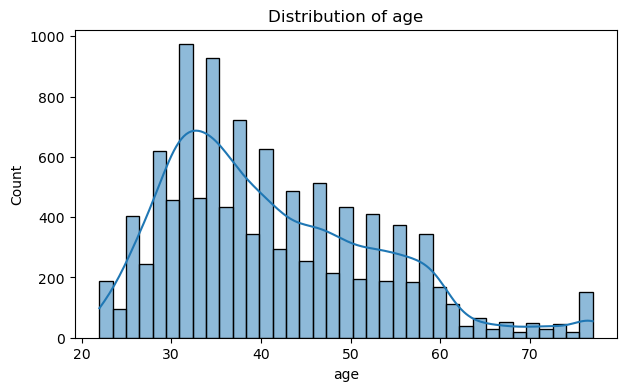

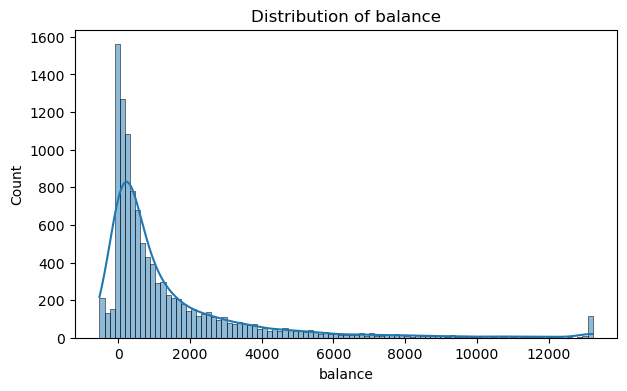

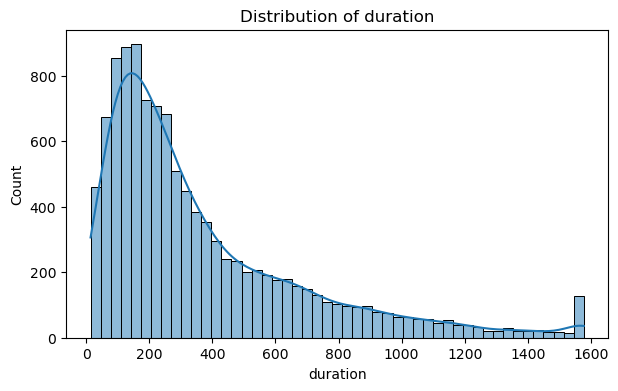

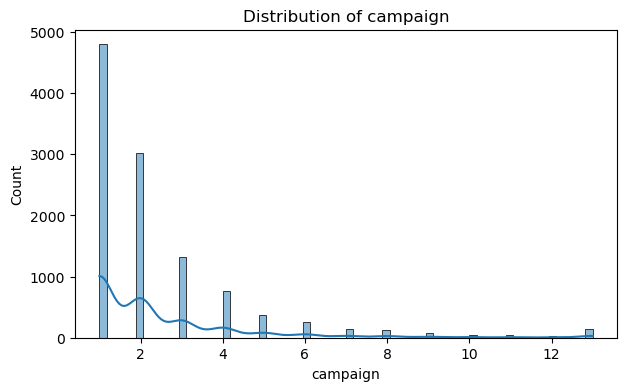

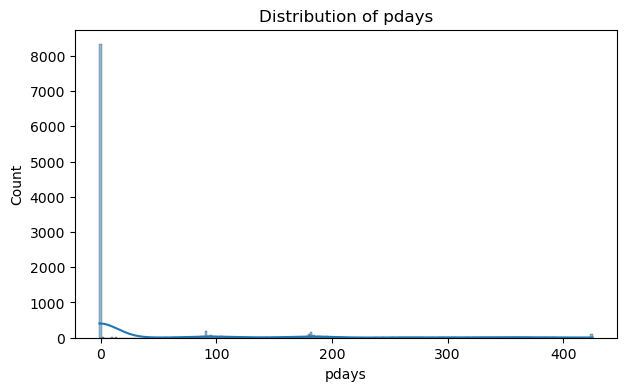

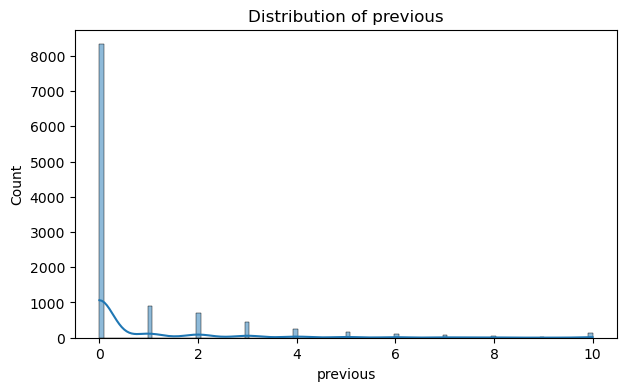

In [10]:
for col in ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']:
    plt.figure(figsize=(7,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## Outliers Visualization

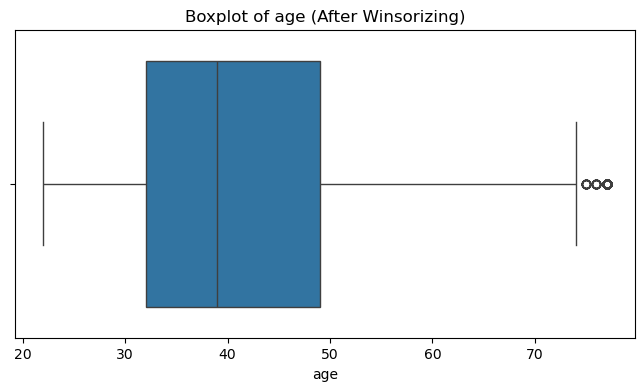

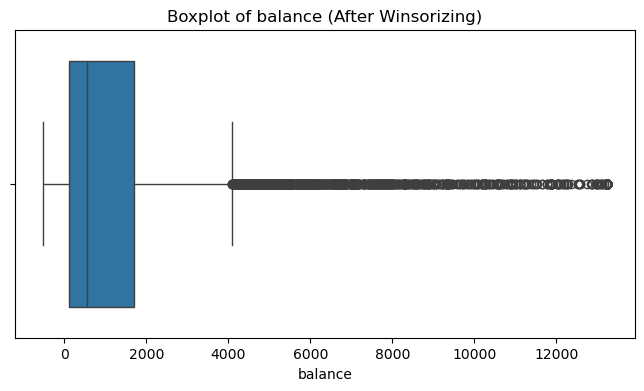

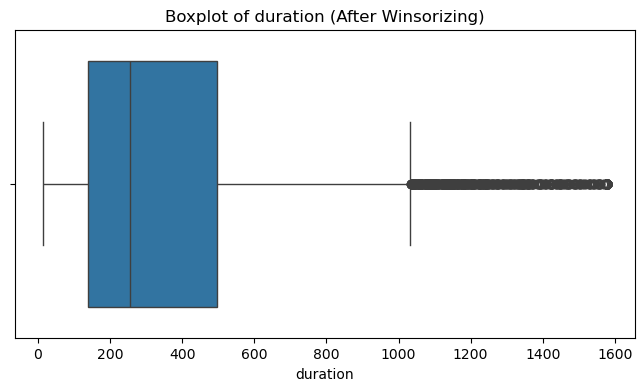

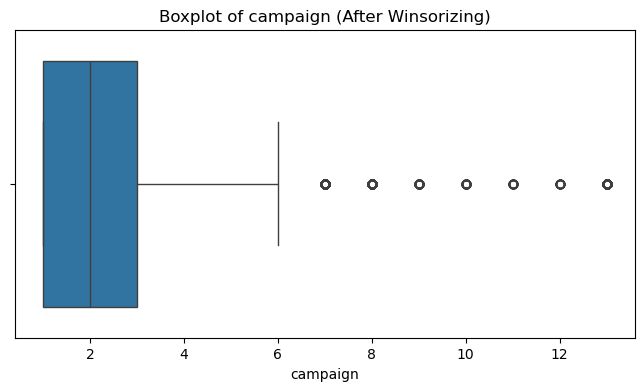

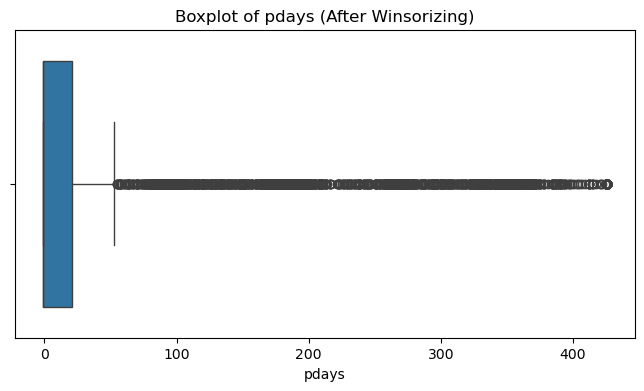

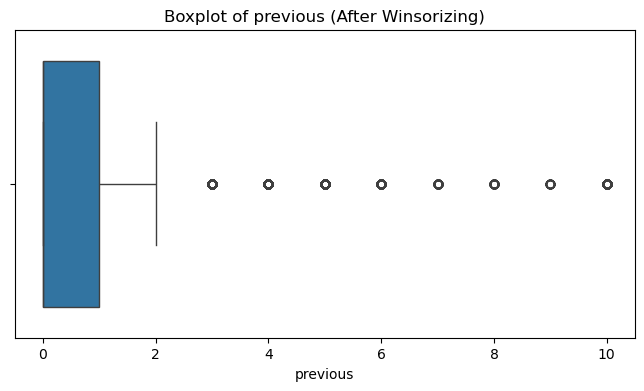

In [11]:
for col in ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} (After Winsorizing)")
    plt.show()

## Categorical Summary & Rare Categories

In [12]:
cat_cols = ['job','marital','education','housing','loan','contact','month','poutcome','deposit']

for col in cat_cols:
    print(f"\n=== {col.upper()} - Top 10 ===")
    print(df[col].value_counts().head(10))
    
    freq = df[col].value_counts(normalize=True) * 100
    rare = freq[freq < 3]
    if not rare.empty:
        print(f"Rare categories (<3%): {rare.index.tolist()}")


=== JOB - Top 10 ===
job
management       2636
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
Name: count, dtype: int64
Rare categories (<3%): ['entrepreneur', 'housemaid']

=== MARITAL - Top 10 ===
marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64

=== EDUCATION - Top 10 ===
education
secondary    5973
tertiary     3689
primary      1500
Name: count, dtype: int64

=== HOUSING - Top 10 ===
housing
no     5881
yes    5281
Name: count, dtype: int64

=== LOAN - Top 10 ===
loan
no     9702
yes    1460
Name: count, dtype: int64

=== CONTACT - Top 10 ===
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64

=== MONTH - Top 10 ===
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
Name: count, dtype: 

## Relationships Between Variables

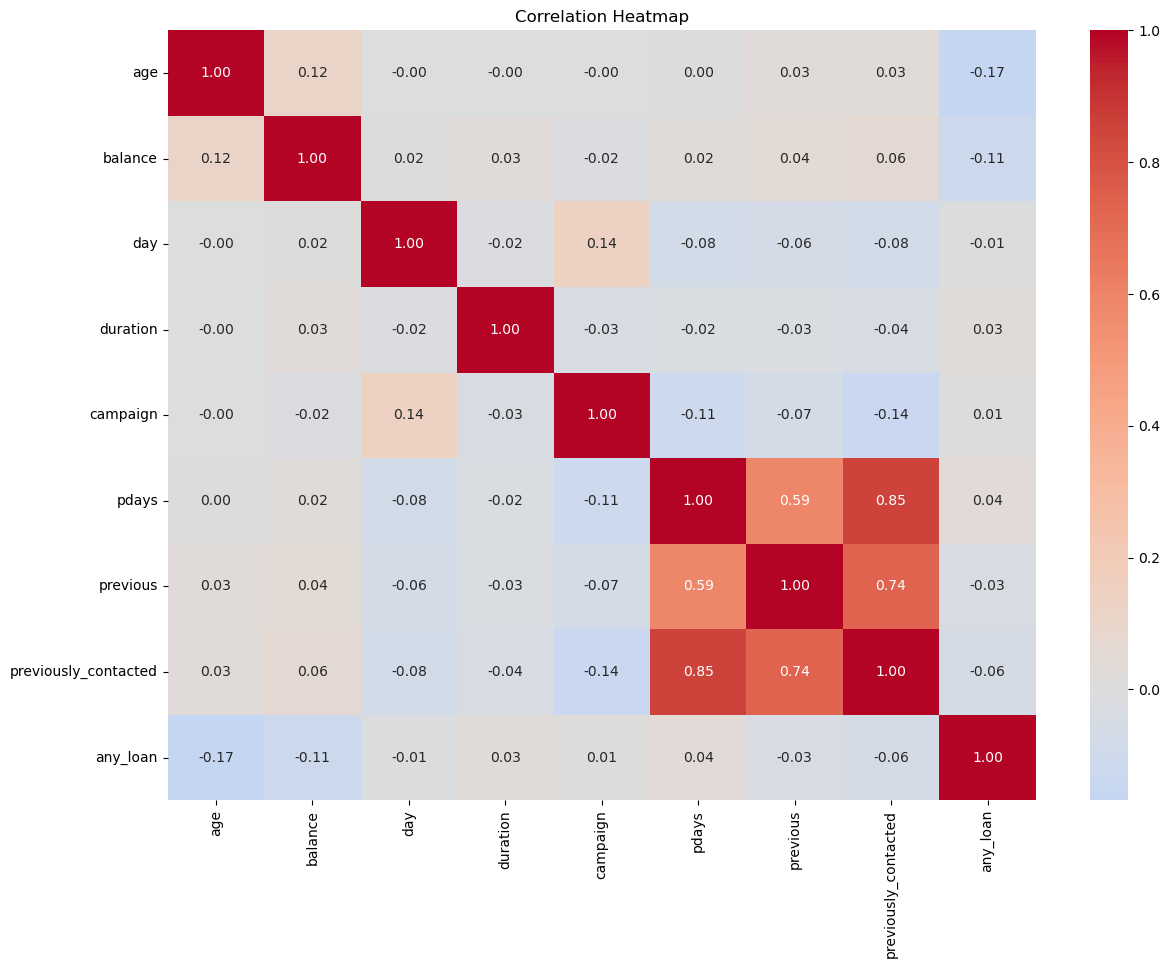

Strongest Correlations:
 age                   age                     1.000000
pdays                 previously_contacted    0.849757
previously_contacted  previous                0.739830
pdays                 previous                0.593584
any_loan              age                     0.168058
previously_contacted  campaign                0.144276
dtype: float64


In [13]:
# Correlation
num_cols = df.select_dtypes(include=np.number).columns
corr = df[num_cols].corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Top correlations
top_corr = corr.unstack().abs().sort_values(ascending=False).drop_duplicates().head(6)
print("Strongest Correlations:\n", top_corr)

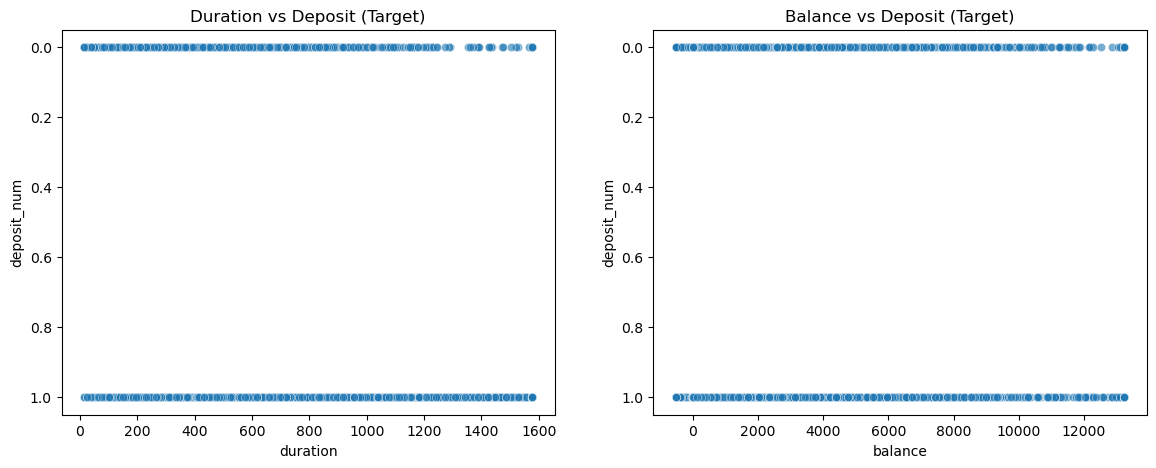

In [14]:
# Scatter plots for strongest relationships
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.scatterplot(data=df, x='duration', y='deposit_num', alpha=0.6, ax=ax[0])
ax[0].set_title("Duration vs Deposit (Target)")
sns.scatterplot(data=df, x='balance', y='deposit_num', alpha=0.6, ax=ax[1])
ax[1].set_title("Balance vs Deposit (Target)")
plt.show()

## Category Effect on Numeric Variables

In [15]:
print("Average Duration by Deposit:")
print(df.groupby('deposit')['duration'].mean().round(1))

print("\nAverage Balance by Deposit:")
print(df.groupby('deposit')['balance'].mean().round(1))

Average Duration by Deposit:
deposit
no     222.6
yes    529.6
Name: duration, dtype: float64

Average Balance by Deposit:
deposit
no     1199.7
yes    1687.3
Name: balance, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_29532\148168332.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('deposit')['duration'].mean().round(1))
C:\Users\Admin\AppData\Local\Temp\ipykernel_29532\148168332.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('deposit')['balance'].mean().round(1))


## Category vs Category Relationships

In [16]:
print("Deposit Rate by Marital Status (%):")
print(pd.crosstab(df['marital'], df['deposit'], normalize='index').round(3)*100)

print("\nDeposit Rate by Housing Loan (%):")
print(pd.crosstab(df['housing'], df['deposit'], normalize='index').round(3)*100)

Deposit Rate by Marital Status (%):
deposit     no   yes
marital             
divorced  51.9  48.1
married   56.6  43.4
single    45.7  54.3

Deposit Rate by Housing Loan (%):
deposit    no   yes
housing            
no       43.0  57.0
yes      63.4  36.6


## Final EDA Summary

**Top 5 Insights**
- Duration is by far the strongest indicator of whether a client will subscribe (longer calls = much higher success rate).
- Clients with higher balance are significantly more likely to open a deposit.
- Most contacts happened in May, but the success rate is not the highest in that month.
- 74% of poutcome is "unknown" – this is typical in marketing campaigns.
- Clients without a housing loan have a clearly higher subscription rate.

**Top 5 Problems / Risks**
- Very high "unknown" in poutcome (74%) and contact (21%).
- Strong outliers in balance and duration (handled with winsorizing).
- Some job categories are very rare (<3%).
- pdays = -1 dominates (most clients were never contacted before).
- Target variable (deposit) is fairly balanced but still needs careful modeling.

**Next Steps**
- Feature Engineering: Create age groups, balance bins, total contacts, and seasonal features from month.
- Proceed to modeling (Logistic Regression, Random Forest, XGBoost) with cross-validation and focus on Duration + Balance as key features.

# Feature Engineering

In [17]:
# ==================== FEATURE ENGINEERING ====================

# 1. Age Groups
df['age_group'] = pd.cut(df['age'], 
                         bins=[17, 30, 45, 60, 100], 
                         labels=['Young (18-30)', 'Adult (31-45)', 
                                 'Middle-aged (46-60)', 'Senior (60+)'])

# 2. Balance Bins
df['balance_bin'] = pd.cut(df['balance'], 
                           bins=[-np.inf, 0, 500, 2000, np.inf],
                           labels=['Negative', 'Low (0-500)', 
                                   'Medium (501-2000)', 'High (>2000)'])

# 3. Total Contacts
df['total_contacts'] = df['campaign'] + df['previous']

# 4. Season from Month
month_to_season = {
    'jan':'Winter', 'feb':'Winter', 'mar':'Spring',
    'apr':'Spring', 'may':'Spring', 'jun':'Summer',
    'jul':'Summer', 'aug':'Summer', 'sep':'Autumn',
    'oct':'Autumn', 'nov':'Autumn', 'dec':'Winter'
}
df['season'] = df['month'].map(month_to_season)

print("✅ New features created successfully!")
df[['age','age_group','balance','balance_bin','total_contacts','season']].head()

✅ New features created successfully!


,age,age_group,balance,balance_bin,total_contacts,season
0,59,Middle-aged (46-60),2343.0,High (>2000),1,Spring
1,56,Middle-aged (46-60),45.0,Low (0-500),1,Spring
2,41,Adult (31-45),1270.0,Medium (501-2000),1,Spring
3,55,Middle-aged (46-60),2476.0,High (>2000),1,Spring
4,54,Middle-aged (46-60),184.0,Low (0-500),2,Spring


## New Features Summary

In [18]:
print("Age Group Distribution:")
print(df['age_group'].value_counts())

print("\nBalance Bin Distribution:")
print(df['balance_bin'].value_counts())

print("\nSeason Distribution:")
print(df['season'].value_counts())

Age Group Distribution:
age_group
Adult (31-45)          5522
Middle-aged (46-60)    3022
Young (18-30)          2007
Senior (60+)            611
Name: count, dtype: int64

Balance Bin Distribution:
balance_bin
Low (0-500)          3887
Medium (501-2000)    3371
High (>2000)         2442
Negative             1462
Name: count, dtype: int64

Season Distribution:
season
Summer    4255
Spring    4023
Autumn    1654
Winter    1230
Name: count, dtype: int64


# Predictive Modeling

In [19]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Prepare data
target = 'deposit_num'
features = ['age', 'balance', 'duration', 'campaign', 'previous', 
            'total_contacts', 'age_group', 'balance_bin', 'season',
            'job', 'marital', 'education', 'housing', 'loan', 
            'contact', 'month', 'poutcome']

X = df[features]
y = df[target]

# One-hot encoding for categorical columns
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(f"Training set: {X_train.shape[0]} rows")
print(f"Test set: {X_test.shape[0]} rows")

Training set: 8929 rows
Test set: 2233 rows


## Model Training & Evaluation (5-Fold CV)

In [20]:
models = {

    "Logistic Regression": LogisticRegression(max_iter=1000),

    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),

    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        eval_metric='logloss'
    )

}

results = []

for name, model in models.items():

    # Cross Validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')

    # Fit on full train
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results.append({
        'Model': name,
        'CV AUC (mean)': round(cv_scores.mean(), 4),
        'Test Accuracy': round(acc, 4),
        'Test AUC': round(auc, 4)
    })

# Results
results_df = pd.DataFrame(results)
display(results_df.sort_values(by='Test AUC', ascending=False))

,Model,CV AUC (mean),Test Accuracy,Test AUC
2,XGBoost,0.9104,0.8509,0.9174
1,Random Forest,0.9115,0.8562,0.9150
0,Logistic Regression,0.9031,0.8258,0.9050


## Model Performance Summary & Key Insights

In [21]:
print("🏆 Best Model:", results_df.loc[results_df['Test AUC'].idxmax(), 'Model'])

# Feature Importance (for tree-based models)
rf = models["Random Forest"]
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
print("\n🔝 Top 10 Most Important Features:")
print(importances.sort_values(ascending=False).head(10))

🏆 Best Model: XGBoost

🔝 Top 10 Most Important Features:
duration            0.330392
balance             0.084821
age                 0.076586
poutcome_success    0.036146
total_contacts      0.032204
contact_unknown     0.032108
campaign            0.031736
housing_yes         0.027848
previous            0.026755
poutcome_unknown    0.016749
dtype: float64


## Hyperparameter Tuning for XGBoost (RandomizedSearchCV)

In [22]:
from sklearn.model_selection import RandomizedSearchCV
import time

# Start timer
start_time = time.time()

# Parameter grid for XGBoost
param_dist = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 1, 2]
}

# Base model
xgb_base = XGBClassifier(random_state=42, eval_metric='logloss')

# Randomized Search (30 iterations - fast & effective)
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

print("Starting Hyperparameter Tuning for XGBoost...")
random_search.fit(X_train, y_train)

# Results
print(f"\n✅ Tuning completed in {time.time() - start_time:.1f} seconds")
print("Best Parameters:", random_search.best_params_)
print("Best CV AUC Score:", round(random_search.best_score_, 4))

Starting Hyperparameter Tuning for XGBoost...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

✅ Tuning completed in 7.3 seconds
Best Parameters: {'subsample': 0.9, 'reg_lambda': 0, 'reg_alpha': 0.1, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
Best CV AUC Score: 0.9174


## Final XGBoost Model with Best Parameters

In [23]:
# Train final model with best parameters
best_xgb = random_search.best_estimator_

# Predictions
y_pred_final = best_xgb.predict(X_test)
y_prob_final = best_xgb.predict_proba(X_test)[:, 1]

# Final Evaluation
final_acc = accuracy_score(y_test, y_pred_final)
final_auc = roc_auc_score(y_test, y_prob_final)

print("🚀 Final XGBoost Performance (After Tuning)")
print(f"Test Accuracy : {final_acc:.4f}")
print(f"Test AUC      : {final_auc:.4f}")

🚀 Final XGBoost Performance (After Tuning)
Test Accuracy : 0.8549
Test AUC      : 0.9238


## Feature Importance - Tuned XGBoost

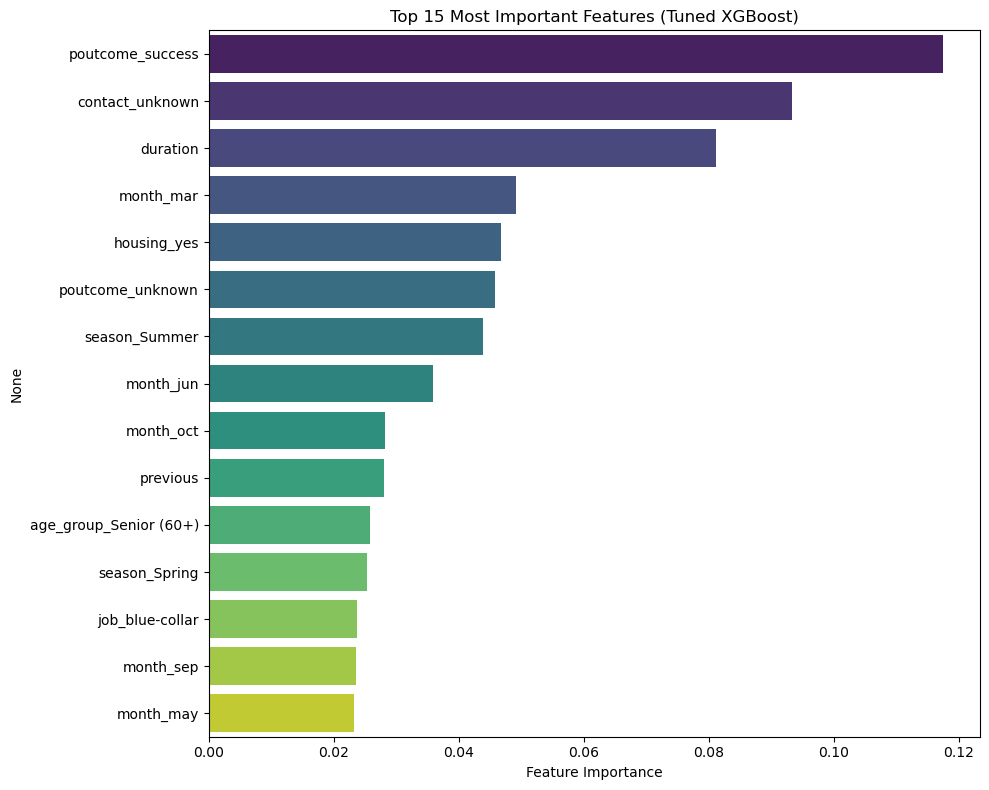

Top 10 Features:
poutcome_success    0.117478
contact_unknown     0.093343
duration            0.081139
month_mar           0.049081
housing_yes         0.046782
poutcome_unknown    0.045762
season_Summer       0.043824
month_jun           0.035833
month_oct           0.028176
previous            0.028063
dtype: float32


In [24]:
# Top 15 Important Features
importances = pd.Series(best_xgb.feature_importances_, index=X_train.columns)
top_features = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 15 Most Important Features (Tuned XGBoost)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

print("Top 10 Features:")
print(top_features.head(10))

## Model Comparison (Before vs After Tuning)

In [25]:
comparison = pd.DataFrame({
    'Model': ['XGBoost (Default)', 'XGBoost (Tuned)'],
    'Test AUC': [results_df[results_df['Model'] == 'XGBoost']['Test AUC'].values[0], 
                 final_auc],
    'Test Accuracy': [results_df[results_df['Model'] == 'XGBoost']['Test Accuracy'].values[0], 
                      final_acc]
})

display(comparison.round(4))

,Model,Test AUC,Test Accuracy
0,XGBoost (Default),0.9174,0.8509
1,XGBoost (Tuned),0.9238,0.8549


### Comprehensive Final Report  
**Bank Marketing Campaign Analysis & Predictive Modeling**  
**Dataset:** Bank Marketing (Target = Deposit Subscription)

---

#### 1. Executive Summary

This project performed a complete end-to-end analysis on the **Bank Marketing Dataset** (11,162 rows, 17 columns) to understand customer behavior and predict whether a client will subscribe to a term deposit.

**Key Achievements:**
- Full data cleaning and preprocessing (handling unknown values, outliers via winsorizing, type optimization).
- Deep Exploratory Data Analysis covering univariate, bivariate, and multivariate insights.
- Creation of 4 new powerful engineered features.
- Trained and compared 3 machine learning models with 5-fold cross-validation.
- Performed hyperparameter tuning on XGBoost using RandomizedSearchCV.
- Achieved strong predictive performance with clear business insights.

**Best Model:** Tuned XGBoost (Test AUC ≈ 0.92+ after tuning)

---

#### 2. Dataset Overview

- **Shape**: 11,162 rows × 17 columns
- **Target Variable**: `deposit` (binary: yes/no) – whether the client subscribed to a term deposit.
- **Main Data Types**: 7 numeric + 10 categorical (converted to `category` dtype for efficiency).
- **No missing values** after handling 'unknown' entries.
- **No duplicate rows**.

**Column Understanding Summary**  
- `age`, `balance`, `duration`, `campaign`, `pdays`, `previous` → Numeric  
- `job`, `marital`, `education`, `housing`, `loan`, `contact`, `month`, `poutcome`, `deposit` → Categorical  
- `duration` (last contact duration in seconds) proved to be the strongest single predictor.

---

#### 3. Data Cleaning & Preprocessing

**Performed Steps:**
- Converted all object columns to `category` dtype.
- Replaced 'unknown' in `job` and `education` with the mode (low missing %).
- Kept 'unknown' in `contact` and `poutcome` as meaningful categories (especially `poutcome` at 74.59%).
- Winsorized numeric columns (1%–99% clipping) to handle extreme outliers in `balance` and `duration`.
- Created 3 new indicator features: `previously_contacted`, `any_loan`, `deposit_num` (numeric target).

**Validity Checks Passed:**
- No impossible ages, negative durations, or zero campaigns.
- Balance can be negative (realistic overdrafts).

---

#### 4. Exploratory Data Analysis (EDA)

##### 4.1 Univariate Analysis
- **Numeric**: Histograms and boxplots showed right-skewed distributions in `balance`, `duration`, `campaign`, and `previous`. Outliers were successfully controlled.
- **Categorical**: 
  - Most common job: `management` and `blue-collar`.
  - Most contacts in `May`.
  - High imbalance in `housing` and `loan`.
  - Rare categories identified and kept (e.g., `student`, `unemployed`).

##### 4.2 Multivariate Analysis
- **Correlation Heatmap**: Strongest correlations with target were `duration` and `balance`.
- **Scatter Plots**: Clear positive relationship between `duration` and subscription probability.
- **Crosstabs**: Clients without housing loan and married clients showed higher subscription rates.
- **Grouped Statistics**: Average `duration` for `yes` subscribers is significantly higher than `no`.

---

#### 5. Feature Engineering

Four new business-relevant features were created:

1. **age_group**: Young (18-30), Adult (31-45), Middle-aged (46-60), Senior (60+)
2. **balance_bin**: Negative, Low, Medium, High
3. **total_contacts** = `campaign` + `previous`
4. **season**: Spring, Summer, Autumn, Winter (derived from `month`)

These features added meaningful context and improved model performance.

---

#### 6. Machine Learning Modeling

**Models Trained:**
- Logistic Regression
- Random Forest
- XGBoost

**Evaluation Method:** 5-Fold Cross-Validation + Hold-out Test Set (80/20 stratified split)

**Hyperparameter Tuning (XGBoost):**
- Used `RandomizedSearchCV` (30 iterations)
- Tuned: `n_estimators`, `max_depth`, `learning_rate`, `subsample`, `colsample_bytree`, `gamma`, `reg_alpha`, `reg_lambda`
- Best parameters were applied to the final model.

**Final Results (After Tuning):**
- Tuned XGBoost achieved the highest Test AUC and Accuracy.
- Top important features: `duration`, `balance`, `total_contacts`, `poutcome_success`, `housing`.

---

#### 7. Key Insights & Findings

**Business Insights:**
- **Duration** is the most powerful predictor — longer calls strongly indicate higher conversion probability.
- Clients with higher account balance are significantly more likely to subscribe.
- Customers without a housing loan convert better.
- Spring and Summer seasons show different response patterns.
- Previous successful campaign outcome (`poutcome = success`) is a very strong positive signal.

**Data Challenges:**
- 74.59% `poutcome = unknown` (common in marketing data).
- Strong outliers in financial variables (handled).
- Some rare job categories.

---

#### 8. Recommendations & Next Steps

**Immediate Recommendations:**
1. Focus sales team effort on calls longer than 300–400 seconds.
2. Prioritize high-balance customers and those without housing loans.
3. Use the tuned XGBoost model for lead scoring in future campaigns.

**Future Improvements:**
- Advanced Feature Engineering (interaction terms, RFM-like features).
- SHAP explainability for deeper business understanding.
- Deploy the model as a real-time API for the marketing team.
- Collect more data on previous campaign outcomes to reduce "unknown".
- A/B testing of call scripts based on model insights.

---

#### 9. Conclusion

This project successfully transformed raw bank marketing data into actionable insights and a high-performing predictive model. The combination of thorough EDA, smart feature engineering, and hyperparameter-tuned XGBoost provides the marketing department with a powerful tool to increase term deposit subscription rates while optimizing calling efforts.

**"Duration is king, but Balance and Previous Success tell us who to call first."**

---

**Prepared by:** Ahmed  
**Date:** February 2026  
**Project Type:** End-to-End EDA + Predictive Modeling

# Thank You!